# FILTROS

## Temario

1. Transformada de Laplace
2. Funciones transferencias
3. Caracterización de los filtros
    1. Pasa-bajos
    2. Pasa-altos
    3. Pasa-banda
    4. Elimina-banda
    5. Pasa-todo
4. Tipos de filtros con LTI. Butterworth, Chebyshev I y II, Elípticos (Cauer), Bessel
5. Obtención de la función transferencia con SciPy  (`sicpy.signal`)
6. Simulación del filtro en Python
7. Presentación de herramienta web para diseño de filtros electrónicos activos: [Web Bench Filter Design Tool](https://webench.ti.com/filter-design-tool/).

## Transformada de Laplace

Hasa el momento en la materia estuvimos trabajando con la transformada de Fourier.
A esta transformada la podemos pensar como la correlación de la señal que se desea transformar con senos y cosenos de diferentes frecuencias que hacemos variar entre $-\infty$ e $\infty$.

La principal desventaja de está transformada, por la características periódicas del seno y del coseno, es que no permite capturar las componentes transitorias de las señales.
Para salvar esta dificultad se define la transformada de Laplace.
Se define a transformada de Laplace $F(s)$ de una función definida para $t\in\mathbb R \ge 0$ como:

$$F(s) = \int_{0}^{\infty} e^{-st}f(t)dt$$

La función de tranformación anterior se la conoce como transformada unilateral de Laplace.

Es importante notar que la transformada de Laplace es una generalización de la transformada de Fourier. Analizando la expresión anterior y sabiendo que la variable es un número complejo que podemos escribir como:

$$s=\sigma  \pm j\omega$$

podemos ver que si tomamos $\sigma=0$ lo que tenemos es exactamente la transformada de Fourier.

## Tabla de transformadas de Laplace

Para funciones típicas, existen tablas de transformada de Laplace que nos permiten rápidamente ir del dominio $t$ (en general tiempo) al dominio de Laplace $s$, que se lo conoce como dominio de frecuencia generalizada.

![Tabla de transformadas de Laplace](bg2.png)

### Propiedades

La trasformada de Laplace tiene propiedades similares a la de la transformada de Fourier.

Siendo $\alpha$, $\beta$ $\in$ $\mathbb R$ y $f(t)$ $g(t)$ dos funciones definidas para $t \ge 0$ entonces la transformada de Laplace satisface las siguientes propiedades:

#### Linealidad

$$\mathcal {L}\{\alpha f(t)+\beta g(t)\}=\alpha {\mathcal {L}}\{f(t)\}+\beta {\mathcal {L}}\{g(t)\}$$

#### Primer teorema de traslación

Esta propiedad se obtiene aplicando la definición de transformada y a través del cambio de variable $u=s-a$.

 $$\mathcal {L}\{e^{at}f(t)\}=F(s-a)$$

#### Segundo teorema de traslación

Esta propiedad se demuestra por definición y teniendo en cuenta la definición de la función escalón unitario

$$\mathcal {L}\{f(t-a)u(t-a)\}=e^{-as}\mathcal {L}\{f\}$$

#### Transformada de una derivada de primer orden

$\mathcal{L}\left\{\dfrac{df(t)}{dt}\right\}=sF(s)-f(0)$

#### Transformada de una derivada de segundo orden

- $\mathcal{L} \left\{ \dfrac{d^2f(t)}{dt^2} \right\}=s^2F(s)-sf(0)-f'(0)$

#### Transformada de una derivada de orden n

$\mathcal{L} \left\{ \dfrac{d^nf(t)}{dt^n} \right\}= s^n F(s)- s^{n-1}f(0) - s^{n-2}f'(0) - \ldots - sf^{n-2}(0)-f^{n-1}(0)$

#### Transformada de la Integral de una función

$$\mathcal{L} \left\{ \int_0^tf(\tau)d\tau \right\} =\dfrac{F(s)}{s}$$

#### Valor final de una función: teorema de valor final

$$f(\infty)=\lim_{s\rightarrow 0}sF(s)$$

#### Valor inicial de una función: teorema de valor inicial

$$f(0)=\lim_{s\rightarrow \infty}sF(s)$$

Usando la tabla anterior junto con las propiedades, podemos obtener rapidamente la transformada de Laplace de un conjunto muy grande de funciones temporales.

## Función transferencia

Para definir la función transferencia vamos a comenzar estudiando un ejemplo mecánico simple: un sistema lineal de una masa y un resorte. Vamos a estudiar la velocidad de la masa según una entrada fuerza aplicada a la misma.

![Sistema masa resorte](ejemplo_sis_mec.png)

Las ecuaciones que gobiernan el movimiento de la masa son principalmente las leyes de Newton:

$$f(t) - bv(t) - kx(t) = ma(t)$$

A esta misma ecuación la podemos expresar como:

$$ f(t) - b\frac{\text{d}x(t)}{dt} - kx(t) = m \frac{\text{d}^2x(t)}{dt^2} $$

donde $f(t)$ es la fuerza aplicada a la masa (entrada del sistema) y $x(t)$ es la posición de la masa (salida del sistema).

Obtener la respuesta temporal del sistema a partir de esta ecuación puede resultar complejo ya que requiere resolver la ecuación diferencial anterior. Por otro lado, es difícil de estudiar en forma genérica que pasa para diferentes funciones de la entrada $f(t)$.
Aquí es donde la transformada de Laplace comienza a ser de gran utilidad.

Suponiendo que existen las transformadas de Laplace de $f(t)$ y $x(t)$ y que las mismas son $F(s)$ y $X(s)$ respectivamente, podemos escribir la misma ecuación anterior en el dominio transformado de Laplace utilizando las propiedades vistas anteriormente:

$$ F(s) - b sX(s) - kX(s) = m s^2 X(s)$$

Podemos notar que pasamos de una ecuación diferencial en el dominio temporal a una ecuación algebraica en el dominio temporal. Además, a la ecuación anterior la podemos reescribir como:

$$ \frac{X(s)}{F(s)} = \frac{1}{ms^2+bs+k} $$

Esta última ecuación es la descripción del sistema escrita como la relación entre la salida y la entrada del sistema en el dominio transformado de Laplace. A esta realación de la conoce como **función transferencia** del sistema.

## Ejercicio (5 minutos)

Usando la tabla de propiedades, obtener la función transferencia del sistema si la salida es la velocidad $v(t)$

## Anti tranformada de Laplace de la función transferencia

Por otro lado, dijimos que la transformada de Laplace es, en general, la transformada de señales temporales.
Entonces, podríamos preguntarnos, ¿qué señal temporal es la antitransformada de la función transferencia?

Para responder a esta pregunta lo que haremos es analizar que excitación se necesita el sistema para que la salida sea, en el dominio de Laplace, la función transferencia. Dejando la salida n función de la entrada, tenemos que:

$$X(s)=\frac{1}{ms^2+bs}F(s)$$

Si $F(s)$ es 1 entonces la respuesta del sistema es la función transferencia. Ahora, de la tablas de transformadas de Laplace podemos ver que la señal temporal cuya transformada es 1 es el impulso unitario. Por lo tanto tenemos que:

$$X_{\delta}(s)=\frac{1}{ms^2+bs}$$

donde $X_{\delta}(s)$ es la transformada de Laplace de la salida del sistema cuando la entada es un impulso unitario. 

Por lo tanto podemos decir que **la función transferencia es la transformada de Laplace  de la respuesta al impulso de un sistema LTI**.

## Ejercicio de simulación del sistema mecánico

El pauqete de control instalado con las herramientas del curso nos brinda la posibildad de implementar sistemas descriptos a partir de su función transferencia y simularlos frente a entradas.

El paquete de control aprovecha la particularidad de que las funciones transferencias transferencias son, en general, relaciónes de polinomios en $s$, por lo tanto se definen con los coficientes del polinomio numerador y los coeficientes del polinomio numerador.

In [1]:
from control import tf, step_response
m=1
b=0.2
k=0.5

H=tf([1],[m,b,k]) # primer arg coef. de pol. den y seg arg coef. del pol. den.
H

TransferFunction(array([1]), array([1. , 0.2, 0.5]))

In [2]:
r = step_response(H) # simula al sistema anterior con una entrada escalón 
                     # unitario en t=0
r

En `r` se encuentra la información relevante de la respuesta al escalón del este sistema. Si queremos graficar la señal de salida del sistema, luego del escalón podremos hacerlo usando `matplotlib`.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

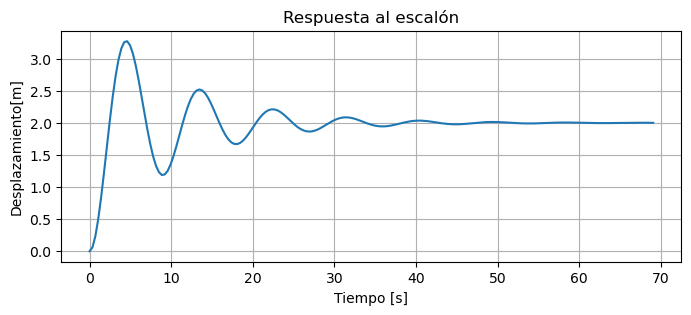

In [4]:
plt.figure(figsize=(8,3))
plt.plot(r.t, r.y[0,0])
plt.grid()
plt.title('Respuesta al escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento[m]');

Si se observa el código detenidamente podrán ver que la salida se usa con el indice [0,0]. Para entender esto veamos la forma que tiene el `y` de la respuesta al escalón.

In [5]:
r.y.shape

(1, 1, 196)

Podemos ver que el la respuesta tiene 3 dimensiones.
En tercera dimensión se encuentran los puntos de la respuesta al escalón, las primeras dos dimensiones se usan en casos de que el sistema simulado tenga muchas entras/salidas.
Con la primera dimensión se seleccion la salida, y con la segunda dimensión la entrada a la cual se aplica el escalón.
En este caso como el sistema tiene solo una entrada y una salida debemos seleccionar obliagoriamente la salida 0 para la primer dimensión y la entrada 0 para la segunda dimensión.

## Ejercicio (5 minutos)

Usando la función `impulse_response` graficar la respueta al impulso (o lo que es lo mismo, la antitrasformada de la función transferencia)

## Ejercicio (15 minutos)

Obtener la transformada de Laplace del sistema del pizarrón sabiendo que la entrada de la tensión $u(t)$ en bornes de la fuente, la salida es la tensión $y(t)$ en bornes de la resistencia, y que la ecuación que gobierna la tensión en un capacitor es 

$$v_c(t) = \frac{1}{C}\int_0^ti_C(t)dt$$ 

y la tensión en la resistencia es 

$$v_R(t)=i_R(t)R$$

Ayudas:
1. Aplicar ley de Kirchoff de tensiones teniendo en cuenta que $i_R(t) = i_C(t)$ escribiendola $u(t)= v_c(t)+v_R(t)$ 
2. Transformar por Laplace la ecuación anterior y obtener la función transferencia $\frac{I_R(s)}{U(s)}$
3. A partir de la ecuación anterior se puede obtener $\frac{V_C(s)}{U(s)}$ y $\frac{V_R(s)}{U(s)}$

## Filtros analógicos

Vamos a describir las características de los tipos de filtros más habituales.
Por otra parte, un cierto conocimiento de filtrado analógico es necesario para diseñar las etapas de adquisición (filtros antialising) y reproducción (filtros de reconstrucción) en sistemas de procesamiento digital.
Se distinguen por la caída de la respuesta en frecuencia en la primera década, desde la frecuencia de corte y en el retardo de grupo.
En la siguiente figura mostramos las respuestas en frecuencia que definen la los filtros analógicos más empleados.

En general, para poder sintetizar un filtro análogico, primero vamos a obtener su función transferencia.
Según los objetivos del filtro existen distintos tipos entre los cuales podemos elegir para obtener la función transferencia.

## Tipos de filtros según su rango de frecuencias de paso

- pasa-bajos: permite el paso de bajas frecuencias eliminando las altas
- pasa-altos: permite el paso de las altes frecuencias elimando las altas
- pasa-banda: permite el paso de un rango de frencuencias, elimando las altas y las bajas
- elimina-banda: rechaza un rango de frecuencias, permitiendo el paso de frecuencias altas y bajas
- pasa-todos: son filtro que lo que buscar es modificar la fase más que la ganancia del sistema.

## Parámetros de los filtros 

- frecuencia de corte: frecuencia a la cual la ganancia cae 3 db respecto a la ganancia en la freuncia de paso: (frecuencia infinita para el pasa alto, frecuencia 0 para el pasa bajo y frecuencia media para el pasa banda)
- ancho de banda: tiene sentido su definición para el pasa-banda y es la resta entre la frecuencia de corte superior y la inferior del filtro. En un pasa-bajos el ancho de banda es la frecuencia de corte del sistema.
- atenuación mínima: en general se requiere una atenuación mínima en un rango de frecuencias determinado en la banda de rechazo. Por ejemplo para un filtro pasabajos de frecuencia de corte 100 Hz se le puede pedir una atenuación (inversa de la ganancia) mínima de 100 para frecuencias mayores a 500 Hz.

## Tipos de filtros según su forma en la banda de paso y de rechazo

![Tipos de filtro según su forma](tipos_filtros.png)

- Filtro de butterworth: Respuesta maximamente plana en la banda de paso y en la banda de eliminación.
- Filtro de   filtros Tchebyshev tipo I: consiguen una caída más abrupta a frecuencias bajas en base a permitir un rizado de la respuesta en frecuencia en alguna de las bandas:
  - Son filtros solo polos
  - Presentan rizado constante en la banda pasante
  - Presentan una caída monotónica en la banda no pasante

- Filtro de filtros Tchebyshev tipo II: consiguen una caída más abrupta a frecuencias bajas en base a permitir un rizado de la respuesta en frecuencia en alguna de las bandas:
  - Son filtros polos y ceros
  - Presentan rizado constante en la banda atenuación
  - Presentan una caída monotónica en la banda de paso
- Filtro de Cauer: consiguen una caída más abrupta en base a permitir rizados constantes en ambas bandas.
- Filtro de Bessel: son filtros solo polos que no pretenden optimizar la anchura de la zona de transición sino asegurar fase lineal en toda la bandas pasante, ya que los filtros anteriores la degradaban progresivamente con la frecuencia.

## Herramienta de diseño de filtro

El paquete de `scipy` de Python cuenta con varias herramientas para el diseño de filtros dentro del módulo `signal`.

Vamos a mostrar aquí las funciones para un filtro butterworth:

- `scipy.signal.buttord`: sirve para obtener el orden del filtro de butterwoth que cumple con los requerimientos en la banda de paso y en la banda de rechazo. Toma como argumento las banda de paso de y rechazo y las ganancias de para esas bandas.
- `scipy.signal.butt`: sirve para obtener el filtro a partir de las frecuecnias de corte y el orden obtenido con la función anterior.

El mismo par de funciones anteriores se puede encontrar para los otros tipos de filtros: Cauer, Chebyshev I y II, y Bessel.

Otras dos funciones útiles par el diseño de filtros pueden ser:

- `scipy.signal.iirdesign`
- `scipy.signal.iirfilter`

Todas estas funciones están pensadas para obtener la función transferencia de un filtro, pero se utilizan de manera diferente. Siempre es conveniente chuequear la documentación de `scipy.signal` al respecto.

### Ejemplo

Supongamos que queremos realizar un filtro pasa-banda con frecuencias de corte 100 y 500 rad/seg, con ganancia 1 en la banda de paso y una atenuación 20 para ganancias menores a 10 rad/seg y mayores 2500 rad/seg.

Para estudiar este filtro voy a utilizar el paquete de control instalado con las herramientas dadas.

In [6]:
from control import tf, bode
from scipy.signal import iirdesign, iirfilter
import matplotlib.pyplot as plt
%matplotlib widget

b,a= iirdesign([100, 500], [10, 2500], 1, 20, True, 'butter', 'ba')
G=tf(b,a)
G

TransferFunction(array([314436.27653764,      0.        ,      0.        ]), array([1.00000000e+00, 7.93014850e+02, 4.14436277e+05, 3.96507425e+07,
       2.50000000e+09]))

In [7]:
z,p,k= iirdesign([100, 500], [10, 2500], 1, 20, True, 'butter', 'zpk')
#G=tf(b,a)
#G

In [8]:
z,p,k

(array([0.+0.j, 0.+0.j]),
 array([ -51.34690369 -69.293686j  ,  -51.34690369 +69.293686j  ,
        -345.16052154+465.80111124j, -345.16052154-465.80111124j]),
 314436.2765376437)

In [9]:
from control import zpk

In [10]:
Gzpk = zpk(z,p,k)

In [11]:
Gzpk.dcgain()

0.0